In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Reading the file
df = pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25


In [3]:
# Analysis the raw file
print(df.info())
print("Shape of the data: \n",df.shape)
print("Description of Data: \n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None
Shape of the data: 
 (6745, 6)
Description of Data: 
         Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


In [4]:
# Sum of null values
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
# Replacing the "/" with "-" in time stamp columns
df["Request timestamp"]=df["Request timestamp"].str.replace("/","-")
df["Drop timestamp"]=df["Drop timestamp"].str.replace("/","-")

In [6]:
#changing the datetime 
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],dayfirst = True)
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],dayfirst = True)

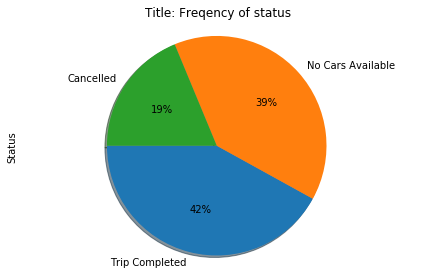

In [7]:
#pie chart for the frequency of status
df.Status.value_counts().plot(kind="pie",startangle = 180,radius=1.10,autopct="%0.0f%%",shadow=True)
plt.title("Title: Freqency of status")
plt.tight_layout()
plt.axis("equal")
plt.show()

In [8]:
# extracting date,hours from timestamp
df["Request_hour"] = df["Request timestamp"].dt.hour
df["Request_date"] = df["Request timestamp"].dt.date
df["Request_time"] = df["Request timestamp"].dt.hour
df["Drop_time"] = df["Drop timestamp"].dt.time

In [9]:
# Creating timeslots according to hours
df["Timeslots"] = pd.cut(df.Request_hour,[0,4,8,12,16,20,24], labels=['night','Early morning','morning','noon','Evening','late Evening'],right=False)

In [10]:
# Creating Request type
df["Request_type"] = df["Pickup point"].apply(lambda x:"Airport to City" if x == "Airport" else "City to Airport")

Here in the below horizontal Bar graph shows us the frequency of cars_status according to the car_status, Timeslots and Pickup_point.

In [11]:
uber = df.groupby(["Status","Request_type"]).Timeslots.value_counts().unstack()

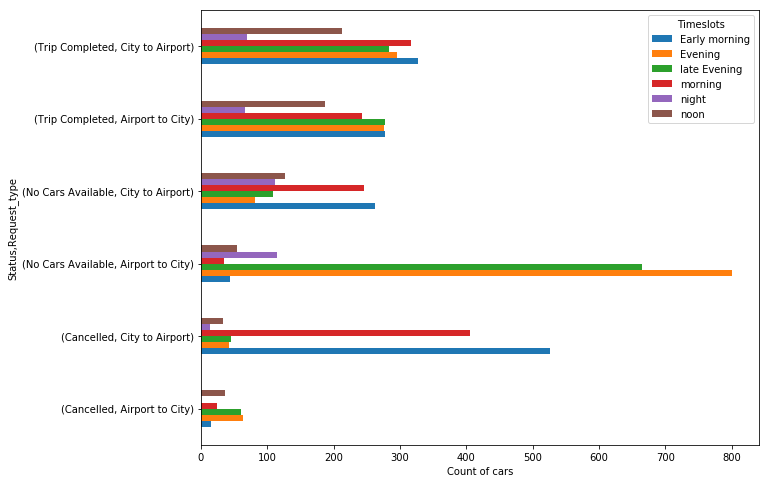

In [12]:
uber.plot(kind="barh",align='center', alpha=1.0,figsize=(10,8)); plt.xlabel("Count of cars")
plt.show()


In [13]:
#Grouping the timeslots, Requesttype , status_frequency
group = df.groupby(["Timeslots","Request_date","Request_type"]).Status.value_counts()

In [14]:
# Creating the group1 , group2 , group3 according to the status of cars
group1 = group.unstack().drop(["No Cars Available","Trip Completed"],1).unstack()
group2 = group.unstack().drop(["Cancelled","Trip Completed"],1).unstack()
group3 = group.unstack().drop(["No Cars Available","Cancelled"],1).unstack()
group1.columns = ['Airport to City','City to Airport']
group2.columns = ['Airport to City','City to Airport']
group3.columns = ['Airport to City','City to Airport']
group1.columns.name = "Request_type"
group2.columns.name = "Request_type"
group3.columns.name = "Request_type"

Here in the below horizontal Bar graph we are providing the more detailing of the day-by-day analysis so that we check the day-to-day status_frequency of car_status, Timeslots and Pickup_point.

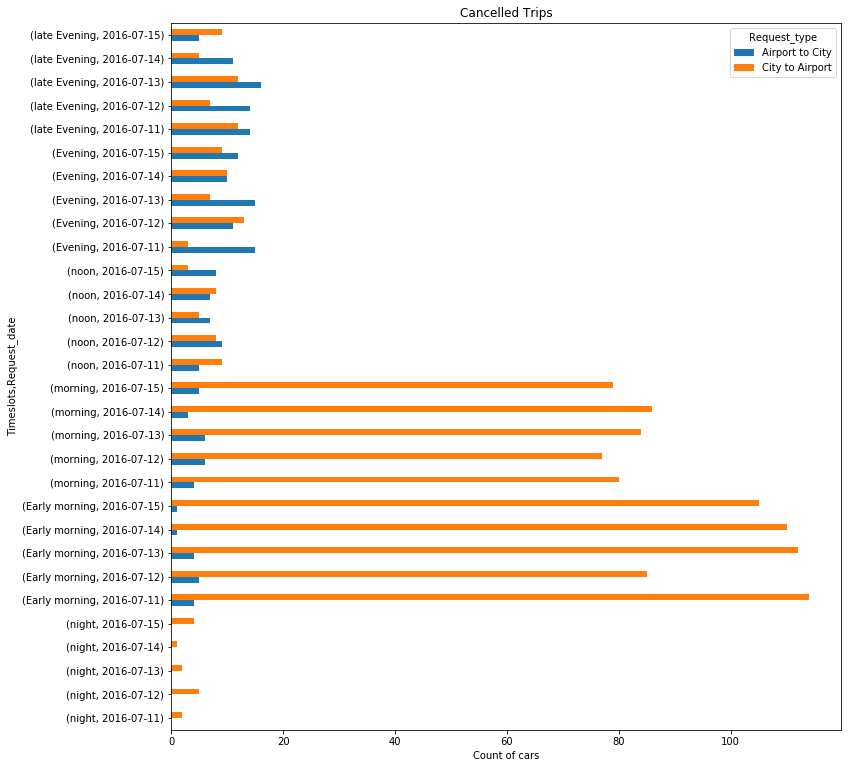

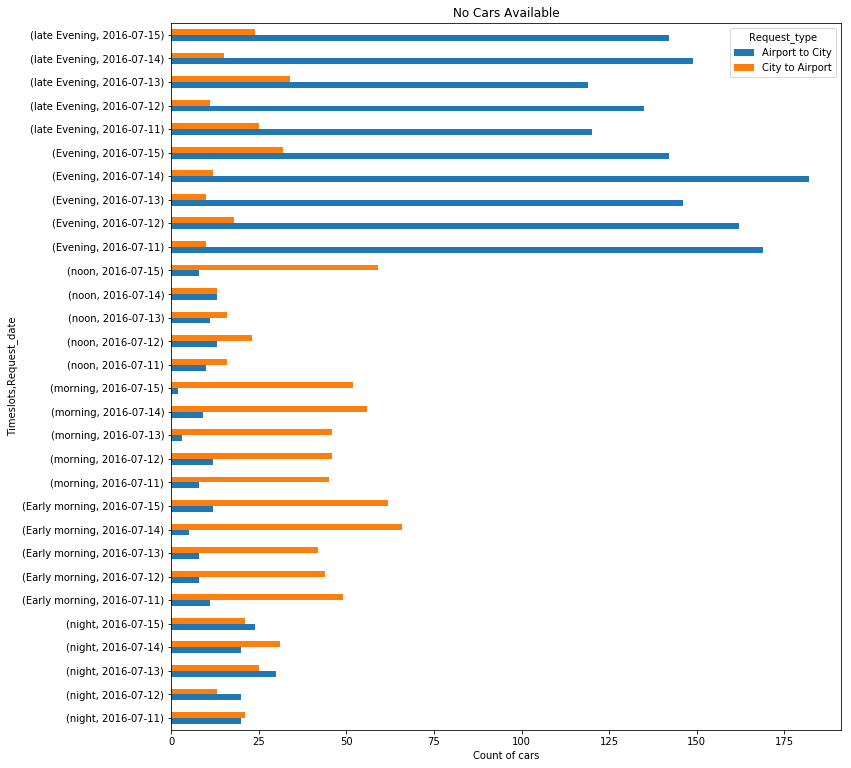

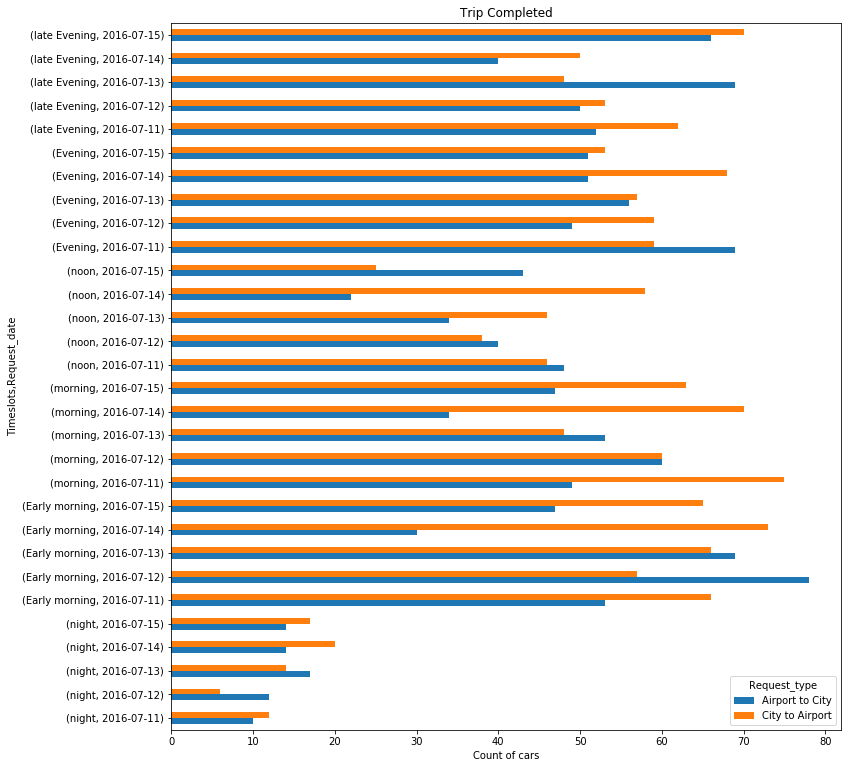

In [15]:
# Ploting the cars according to there status
group1.plot(kind="barh",align='center', alpha=1.0,figsize=(12,13));plt.title("Cancelled Trips");plt.xlabel("Count of cars")
group2.plot(kind="barh",align='center', alpha=1.0,figsize=(12,13));plt.title("No Cars Available");plt.xlabel("Count of cars")
group3.plot(kind="barh",align='center', alpha=1.0,figsize=(12,13));plt.title("Trip Completed");plt.xlabel("Count of cars")
plt.show()

In [16]:
DM = df.groupby("Status").Request_type.value_counts().unstack()

In [17]:
DM1 = DM.unstack().drop("City to Airport").unstack()
DM2 = DM.unstack().drop("Airport to City").unstack()

Here we are making the according to the request type and the count of cars

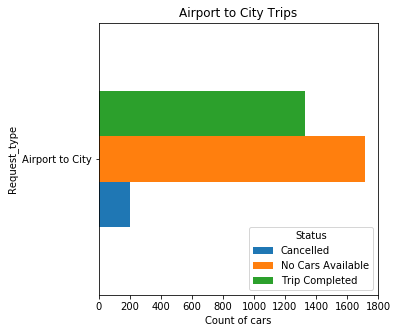

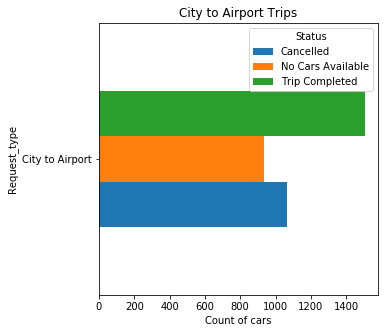

In [18]:
DM1.plot(kind="barh",align='center', alpha=1.0,figsize=(5,5));plt.title("Airport to City Trips");plt.xlabel("Count of cars")
DM2.plot(kind="barh",align='center', alpha=1.0,figsize=(5,5));plt.title("City to Airport Trips");plt.xlabel("Count of cars")
plt.show()


In [19]:
SUP  = df.groupby(["Status","Request_type"]).Timeslots.value_counts().unstack()

In [20]:
SUP1 = SUP.unstack().drop(["Evening","late Evening","morning","night","noon"],1).unstack()
SUP2 = SUP.unstack().drop(["Evening","Early morning","morning","night","noon"],1).unstack()

we are adding two timeslots

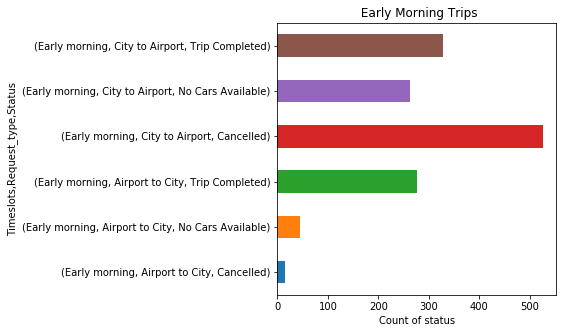

In [21]:
SUP1.plot(kind="barh",align='center', alpha=1.0,figsize=(5,5));plt.xlabel("Count of status");plt.title(" Early Morning Trips")
plt.show()

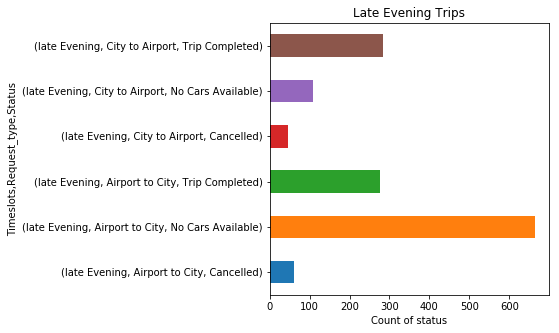

In [22]:
SUP2.plot(kind="barh",align='center', alpha=1.0,figsize=(5,5));plt.xlabel("Count of status");plt.title("Late Evening Trips")
plt.show()

In [25]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,Request_date,Request_time,Drop_time,Timeslots,Request_type
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,2016-07-11,11,13:00:00,morning,Airport to City
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,2016-07-11,17,18:47:00,Evening,Airport to City
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,2016-07-12,9,09:58:00,morning,City to Airport
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,2016-07-12,21,22:03:00,late Evening,Airport to City
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,2016-07-13,8,09:25:00,morning,City to Airport


In [26]:
def bar(x,y,z):
    a = df.groupby(x,y).reset.index()
    a = a[[x,y,z]]
    a = a.pivot(x,y,z)
    a =[["Trip completed","No cars available","Cancelled"]].plot(color=["b","r","y"])
    fig=plt.gcf()
    fig.set_size_inches(12,6)
    plt.show()
bar("Status","Pickup point","Timeslots")

ValueError: No axis named Pickup point for object type <class 'pandas.core.frame.DataFrame'>